In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan['review_scores_accuracy'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: review_scores_accuracy
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['review_scores_accuracy'].max()
Min = Milan['review_scores_accuracy'].min()
Limites = [Min, Max]
Limites

[3.7, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.2999999999999998

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.08373844765168464

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.7, 5.0, 16)
intervalos

array([3.7       , 3.78666667, 3.87333333, 3.96      , 4.04666667,
       4.13333333, 4.22      , 4.30666667, 4.39333333, 4.48      ,
       4.56666667, 4.65333333, 4.74      , 4.82666667, 4.91333333,
       5.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Muy inexacto",
    "Inexacto",
    "Algo inexacto",
    "Moderadamente inexacto",
    "Ligera inexactitud",
    "Bastante preciso",
    "Preciso",
    "Muy preciso",
    "Exacto",
    "Muy exacto",
    "Totalmente exacto",
    "Excelente precisión",
    "Alta precisión",
    "Precisión sobresaliente",
    "Precisión perfecta"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Milan['review_scores_accuracy'] = pd.cut ( x = Milan ['review_scores_accuracy'], bins = intervalos, labels = categorias )
Milan['review_scores_accuracy']

0             Precisión perfecta
1            Excelente precisión
2            Excelente precisión
3              Totalmente exacto
4                    Muy preciso
                  ...           
23700    Precisión sobresaliente
23701    Precisión sobresaliente
23702    Precisión sobresaliente
23703    Precisión sobresaliente
23704    Precisión sobresaliente
Name: review_scores_accuracy, Length: 23705, dtype: category
Categories (15, object): ['Muy inexacto' < 'Inexacto' < 'Algo inexacto' < 'Moderadamente inexacto' ... 'Excelente precisión' < 'Alta precisión' < 'Precisión sobresaliente' < 'Precisión perfecta']

In [12]:
table1 = freq_tbl(Milan['review_scores_accuracy'])
table1

,review_scores_accuracy,frequency,percentage,cumulative_perc
0,Precisión perfecta,8139,0.343345,0.343374
1,Precisión sobresaliente,7531,0.317697,0.661098
2,Alta precisión,2725,0.114955,0.776062
3,Excelente precisión,1640,0.069184,0.845252
4,Totalmente exacto,898,0.037882,0.883137
5,Muy exacto,874,0.036870,0.920010
6,Moderadamente inexacto,527,0.022232,0.942244
7,Exacto,424,0.017887,0.960132
8,Muy preciso,361,0.015229,0.975362
9,Preciso,224,0.009449,0.984812


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_accuracy,frequency
0,Precisión perfecta,8139
1,Precisión sobresaliente,7531
2,Alta precisión,2725
3,Excelente precisión,1640
4,Totalmente exacto,898
5,Muy exacto,874
6,Moderadamente inexacto,527
7,Exacto,424
8,Muy preciso,361
9,Preciso,224


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_accuracy')
Filtro_index

,frequency
review_scores_accuracy,
Precisión perfecta,8139
Precisión sobresaliente,7531
Alta precisión,2725
Excelente precisión,1640
Totalmente exacto,898
Muy exacto,874
Moderadamente inexacto,527
Exacto,424
Muy preciso,361


Text(0, 0.5, 'Frecuencia')

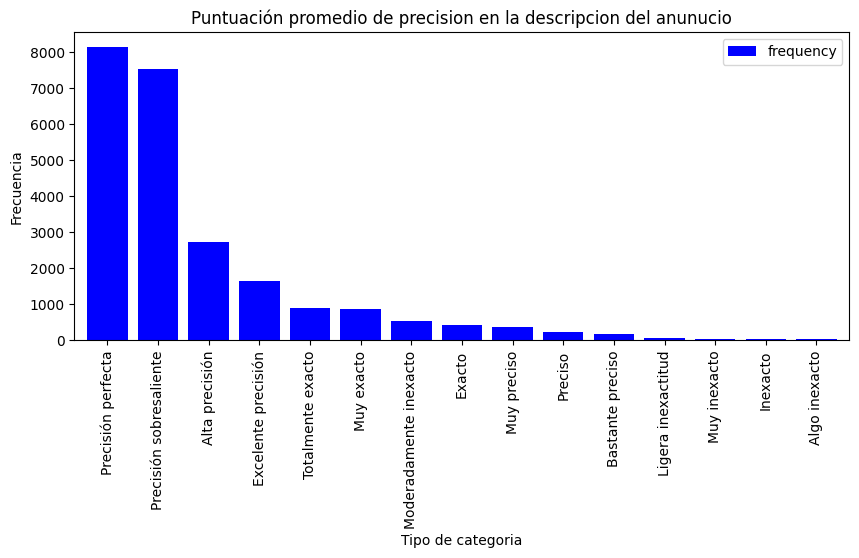

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de precision en la descripcion del anunucio')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')